In [1]:
import numpy as np
import pandas as pd

In [2]:
nobel_data= pd.read_csv('nobel.csv')
nobel_data.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
nobel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

### So who gets the nobel prize
Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented?

In [4]:
#Display the number of  nobel prizes
display(len(nobel_data))

911

In [8]:
#Top 10 countries awarded nobel prizes by birth
display((nobel_data['birth_country']).value_counts().head(10))

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Netherlands                  18
Canada                       18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

In [9]:
#How male and female have won nobel prizes
display(nobel_data['sex'].value_counts()) #We see a skewed ratio of nobel 
#laureates in male to female

Male      836
Female     49
Name: sex, dtype: int64

## 3. USA dominance
Not surprisingly USA has the most winners. In 1901 all laureates were winners, so when did USA start to dominate. We see it decade by decade

In [10]:
nobel_data['USA_born_winner']=nobel_data['birth_country']=='United States of America'
nobel_data['decade']= (np.floor(nobel_data['year']/10)*10).astype(int)
prop_usa_winners= nobel_data.groupby(nobel_data['decade'],as_index=False)['USA_born_winner'].mean()
display(prop_usa_winners)

,decade,USA_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


## Visualizing USA dominance with plot

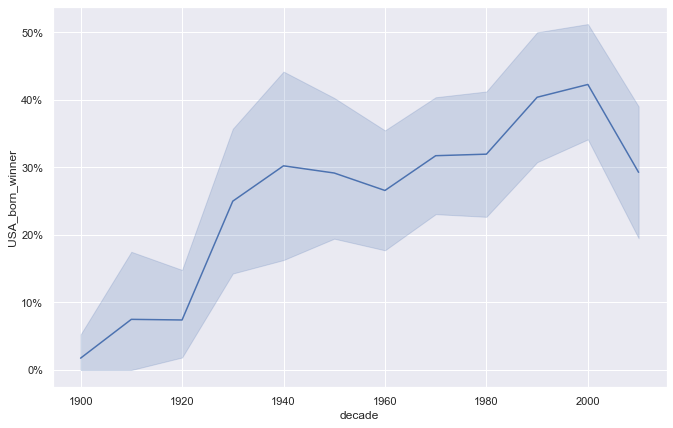

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
#Setting theme
sns.set()
plt.rcParams['figure.figsize']=[11,7]

#Plotting USA based winners
ax= sns.lineplot(x='decade',y='USA_born_winner',data=nobel_data)

#Adding Percentage format on Y axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

## Gender of a nobel laureate

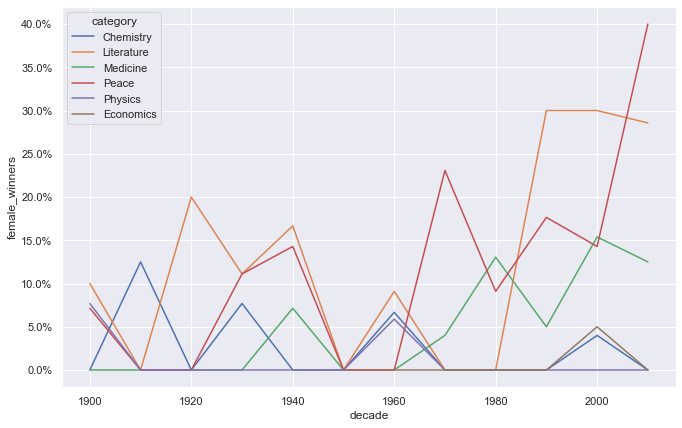

In [15]:
#Getting proprotion of female laureates per decade
nobel_data['female_winners']=nobel_data['sex']=='Female'
prop_female_winners=nobel_data.groupby(['decade','category'],as_index=False)['female_winners'].mean()
#prop_female_winners
ax=sns.lineplot(x='decade',y='female_winners',hue='category',data=prop_female_winners)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

In [17]:
# Picking out the first woman to win a Nobel Prize
nobel_data[nobel_data['sex']=='Female'].nsmallest(1, 'year')
# 1903

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_born_winner,decade,female_winners
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


In [19]:
# Selecting the laureates that have received 2 or more prizes.
nobel_data.groupby('full_name').filter(lambda group: len(group) >= 2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_born_winner,decade,female_winners
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False


## How old are you when you get the prizes?
The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.

But how old are you generally when you get the prize?

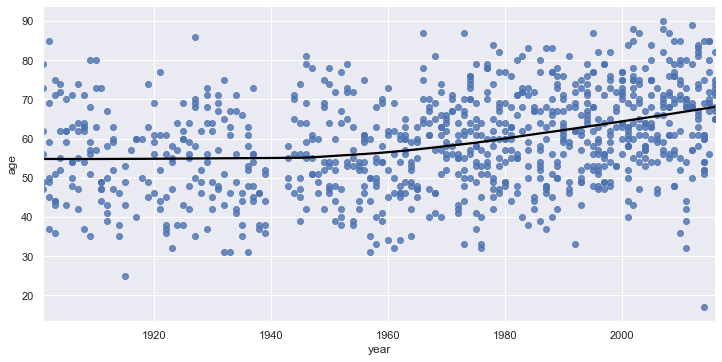

In [21]:
#Converting birth date to date time from strings
nobel_data['birth_date']=pd.to_datetime(nobel_data['birth_date'])

#Extracting the age at which they got nobel
nobel_data['age']=nobel_data['year']-nobel_data['birth_date'].dt.year

#Plotting the nobel laureates in terms of age vs the year they received
sns.lmplot(x='year',y='age',data=nobel_data,lowess=True,aspect=2,line_kws={'color':'black'})

## Age differences in prize category
The plot above shows us a lot! We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates’ ages, and while most are 50+, some are very young.

We also see that the density of points is much high nowadays than in the early 1900s – nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945).

Let’s look at age trends within different prize categories.

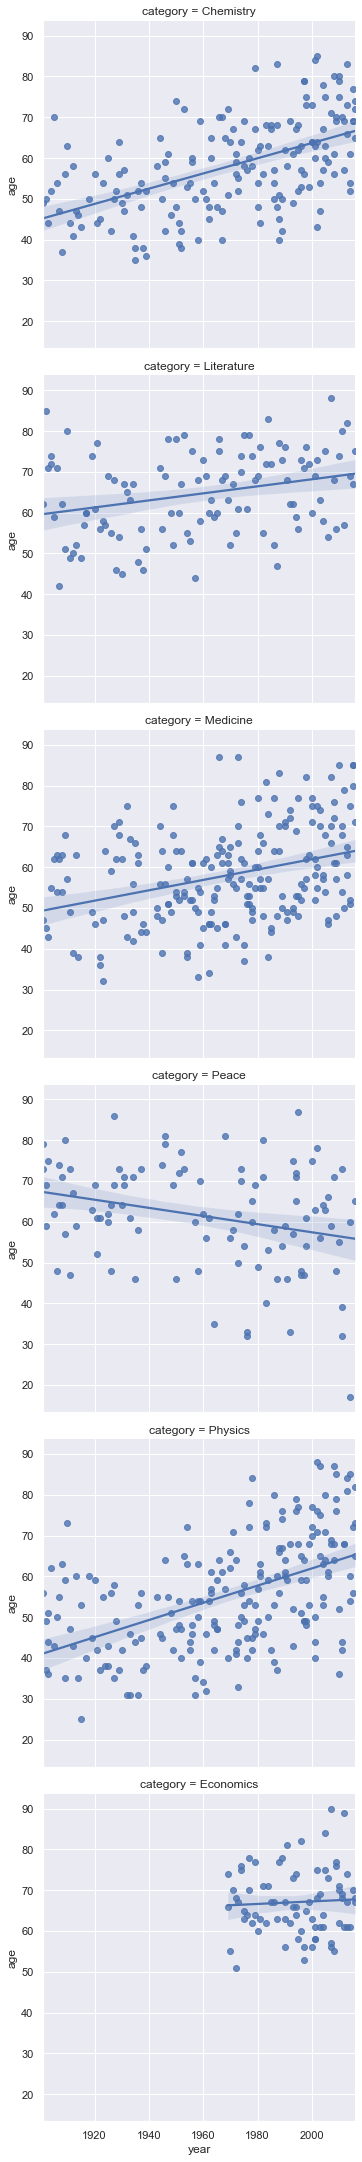

In [22]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(x = 'year', y = 'age', row = 'category',data=nobel_data)

In [24]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel_data.nlargest(1, 'age'))

# The youngest winner of a Nobel Prize as of 2016
display(nobel_data.nsmallest(1, 'age'))

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_born_winner,decade,female_winners,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_born_winner,decade,female_winners,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0


In [27]:
#Oldest and youngest literature nobel laureate in each field
display(nobel_data[nobel_data['category']=='Literature'].nlargest(1,'age'))
display(nobel_data[nobel_data['category']=='Literature'].nsmallest(1,'age'))

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_born_winner,decade,female_winners,age
796,2007,Literature,The Nobel Prize in Literature 2007,"""that epicist of the female experience, who wi...",1/1,817,Individual,Doris Lessing,1919-10-22,Kermanshah,...,NaN,NaN,NaN,2013-11-17,London,United Kingdom,False,2000,True,88.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_born_winner,decade,female_winners,age
38,1907,Literature,The Nobel Prize in Literature 1907,"""in consideration of the power of observation,...",1/1,577,Individual,Rudyard Kipling,1865-12-30,Bombay,...,NaN,NaN,NaN,1936-01-18,London,United Kingdom,False,1900,False,42.0
